<a href="https://colab.research.google.com/github/Vinay-Yadav01/Learning-ML/blob/main/P19(K_Means_Clustering_Algorithm_using_iris_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [15]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


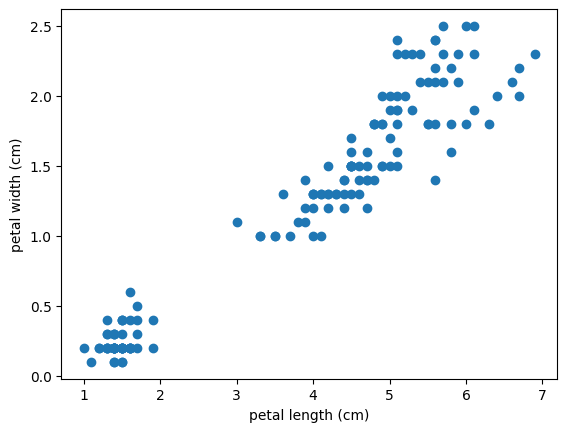

In [17]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [19]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df)
df['Cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Text(0, 0.5, 'petal width (cm)')

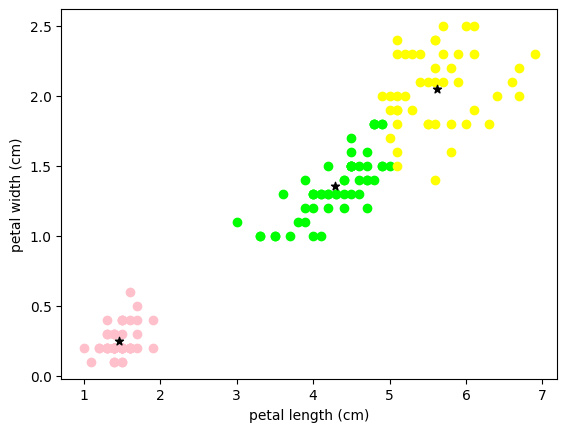

In [23]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='lime')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='pink')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [24]:
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [25]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df)
df['Cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'petal width (cm)')

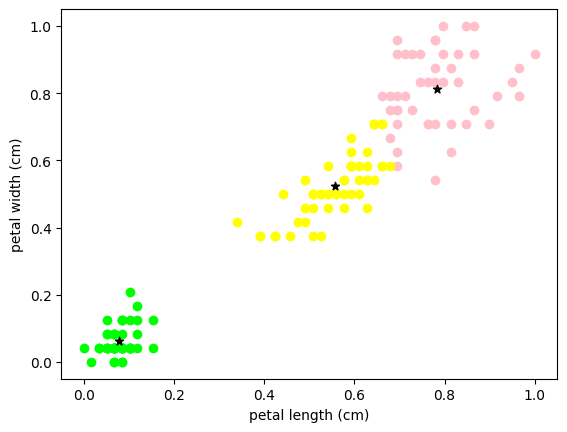

In [26]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='lime')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='pink')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [29]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.161523409420557,
 0.8624305149439355,
 0.6806539059219305,
 0.5651273455703979,
 0.5753110596758519,
 0.4136372577940613]

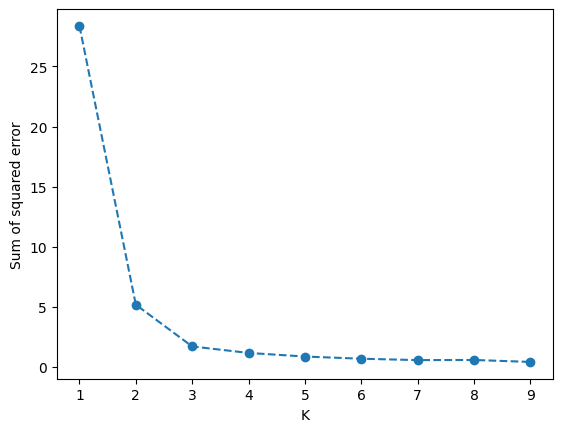

In [30]:
plt.plot(k_rng, sse, ls="--")
plt.scatter(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()